In [2]:
from nnfs.datasets import spiral_data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
X , y = spiral_data(samples = 100 , classes = 3 )
y.shape , X.shape

((300,), (300, 2))

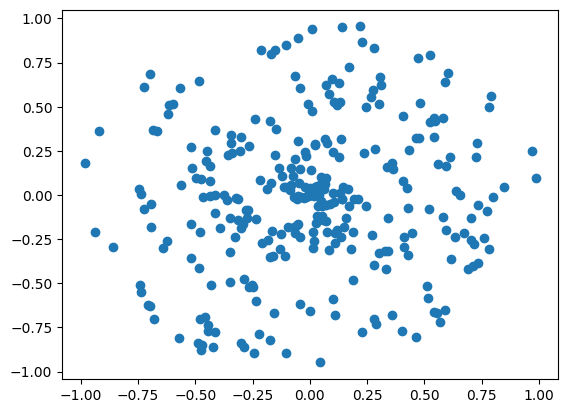

In [4]:
plt.scatter(X[: , 0 ] , X[: ,1])
plt.show()

In [5]:
class Dense:
    def __init__ (self , no_of_neurons : int  , no_of_features : int  , random_seed = None):
        np.random.seed(random_seed)
        self.weights = 3*np.random.randn(no_of_features , no_of_neurons) # weight initialization , multiplied by three hence the standard deviation is thrice
        self.bias = np.zeros([1, no_of_neurons]) #bias initialization 

    def forward(self , Input_X  ):
        self.X = Input_X
        self.n = self.X @ self.weights  + self.bias
    def activation(self ,activation :str ):
        if activation == "relu":
            self.output =np.maximum(0 , self.n)
        if activation == "sigmoid":
            self.output = 1 / (1 + np.exp(self.n))
        if activation == "softmax":
            reduced = np.exp(self.n - np.max(self.n , axis = 1 , keepdims = True))
            denominator = np.sum(reduced , axis = 1 , keepdims = True )
            self.output = reduced / denominator
    def present(self , rows = None , columns = None ):
        print(self.output[0 : rows  , : columns])
        print(self.output.shape)

In [6]:
# As we already created the dataset lets  go with the next process :)
dense_1 = Dense(5 , X.shape[1 ] , 20)
dense_1.forward(X)
dense_1.activation("relu")
dense_1.present(4) # bhai ye waale line se samjha ki jisse tum buate ho wo bhi positional argument me pass hota hai 

[[0.         0.         0.         0.         0.        ]
 [0.00913798 0.02582622 0.         0.03376821 0.02069746]
 [0.0356445  0.05729334 0.         0.02585792 0.02248083]
 [0.04603212 0.08420153 0.         0.05827487 0.04272401]]
(300, 5)


In [8]:
dense_2 = Dense(3 , dense_1.output.shape[1] , 20 )
dense_2.forward(dense_1.output)
dense_2.activation("softmax")
dense_2.present(4)

[[0.33333333 0.33333333 0.33333333]
 [0.31619938 0.33814771 0.3456529 ]
 [0.28192277 0.3219924  0.39608483]
 [0.2647097  0.32393688 0.41135342]]
(300, 3)


Cross Entropy and loss functions 

In [11]:
class CCE(Dense):
    def forward(self , y_pred , y_true):
    